## Visualisations for full dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#pca feature array
full_feat = pd.read_csv(r"C:\Users\dunphsi1\OneDrive - Novartis Pharma AG\Data Science Course\699\vgg19_pca.csv").to_numpy()
print(full_feat.shape)

#df with good/bad labelling
full_labels = pd.read_csv(r"C:\Users\dunphsi1\OneDrive - Novartis Pharma AG\Data Science Course\699\triplicate_batch_images_labels_updated.csv")#.to_numpy()
print(full_labels.shape)

#kmeans_labels array
full_image_names = pd.read_csv(r"C:\Users\dunphsi1\OneDrive - Novartis Pharma AG\Data Science Course\699\vgg19_kmeans_labels.csv").to_numpy().reshape(-1)
print(full_image_names.shape)

(62159, 100)
(62159, 17)
(62159,)


In [5]:
#Identify which cluster numbers have which label

Good_groups_all = list(set(full_labels.loc[full_labels.label=="good","cluster"].to_list()))
print(len(Good_groups_all))
Bad_groups_all = list(set(full_labels.loc[full_labels.label=="bad","cluster"].to_list()))
print(len(Bad_groups_all))
Mediocre_groups_all = list(set(full_labels.loc[full_labels.label=="mediocre","cluster"].to_list()))
print(len(Mediocre_groups_all))
No_response_groups_all = list(set(full_labels.loc[full_labels.label=="no response","cluster"].to_list()))
print(len(No_response_groups_all))
Group_list_by_label_all = [Good_groups_all,Bad_groups_all,Mediocre_groups_all,No_response_groups_all]

9
7
17
7


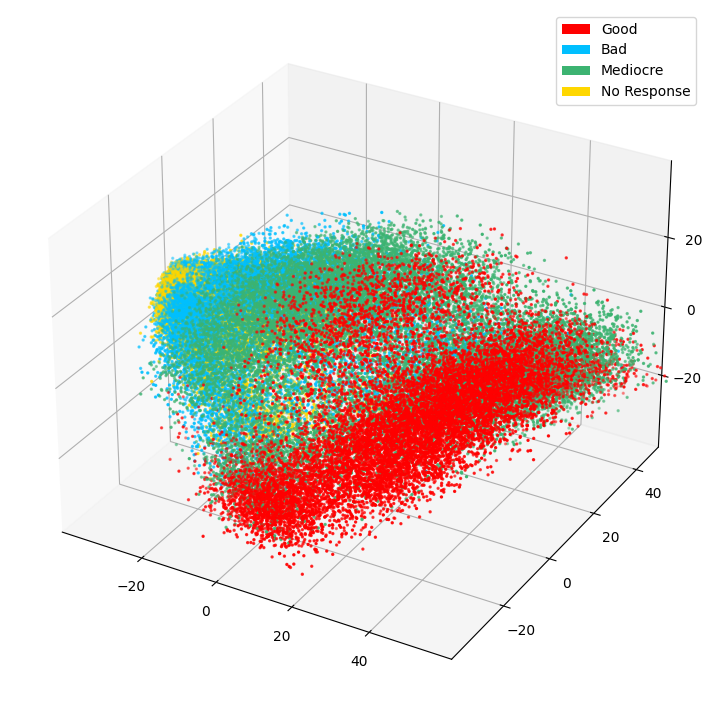

In [6]:
#3d plot of first 3 pca features by label

from matplotlib.patches import Patch

mini_colours = ["red","deepskyblue","mediumseagreen","gold"]
label_name_list = ["Good","Bad","Mediocre","No Response"]

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(projection='3d')

#can manually adjust tick and limits of axes, comment out to just go with default
ax.set_xticks([-40,-20,0,20,40,60])
ax.set_yticks([-40, -20,0,20,40])
ax.set_zticks([-40,-20,0,20,40])

ax.axes.set_xlim3d(left=-39.8, right=58.8) 
ax.axes.set_ylim3d(bottom=-39.8, top=48.8) 
ax.axes.set_zlim3d(bottom=-39.8, top=39.8) 


for label_group in range(0,4):
    for i in Group_list_by_label_all[label_group]:
        filtered_label = full_feat[full_image_names == i]
        ax.scatter(filtered_label[:,0] , filtered_label[:,1],filtered_label[:,2],s=2, label = label_group, color =mini_colours[label_group])
legend_elements = [Patch(facecolor = 'red',label = "Good"),
                   Patch(facecolor = 'deepskyblue',label = "Bad"),
                   Patch(facecolor = 'mediumseagreen',label = "Mediocre"),
                   Patch(facecolor = 'gold',label = "No Response")]
plt.legend(handles = legend_elements)
plt.show()  

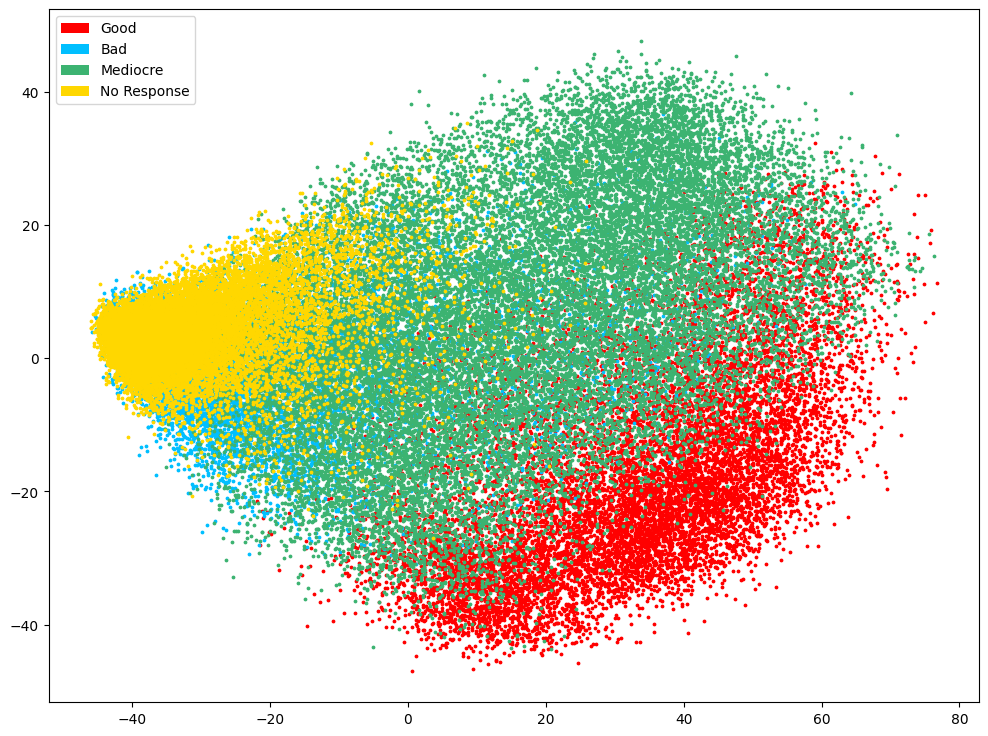

In [7]:
#2d plot of first 2 pca features by label

mini_colours = ["red","deepskyblue","mediumseagreen","gold"]
label_name_list = ["Good","Bad","Mediocre","No Response"]
plt.figure(figsize=(12,9))
for label_group in range(0,4):
    #plt.set_label(label_name_list[label_group])
    for i in Group_list_by_label_all[label_group]:
        filtered_label = full_feat[full_image_names == i]
        plt.scatter(filtered_label[:,0] , filtered_label[:,1],s=3, color =mini_colours[label_group])#, color = [colour_map(1.*j/40) for j in range(40)])

legend_elements = [Patch(facecolor = 'red',label = "Good"),
                   Patch(facecolor = 'deepskyblue',label = "Bad"),
                   Patch(facecolor = 'mediumseagreen',label = "Mediocre"),
                   Patch(facecolor = 'gold',label = "No Response")]
plt.legend(handles = legend_elements)
plt.show()   

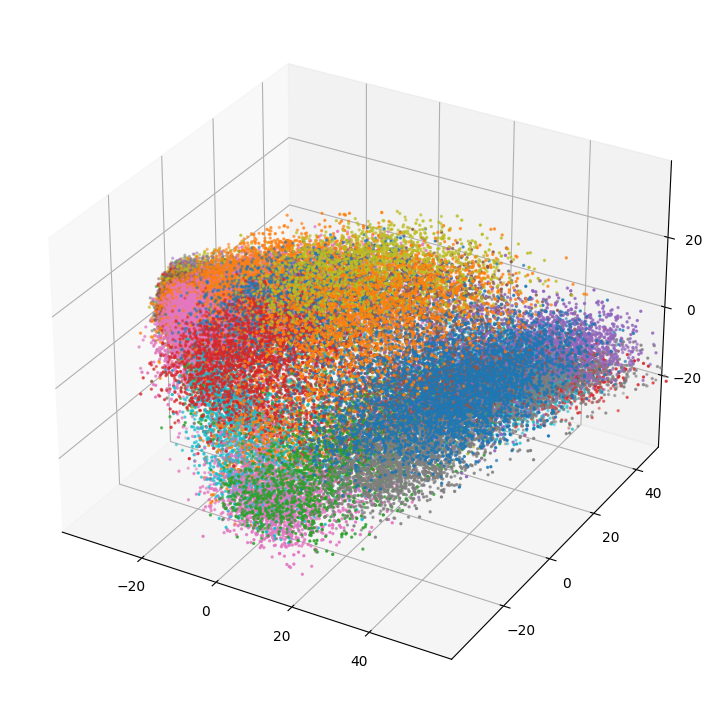

In [9]:
#3d plot of first 3 pca features by cluster

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(projection='3d')
ax.set_xticks([-40,-20,0,20,40,60])
ax.set_yticks([-40,-20,0,20,40])
ax.set_zticks([-40,-20,0,20,40])

ax.axes.set_xlim3d(left=-39.8, right=58.8) 
ax.axes.set_ylim3d(bottom=-39.8, top=48.8) 
ax.axes.set_zlim3d(bottom=-39.8, top=39.8) 

for i in range(0,40): # set to 40 since we had 40 clusters. Change if different #  of clusters used
    filtered_label = full_feat[full_image_names == i]
    ax.scatter(filtered_label[:,0] , filtered_label[:,1], filtered_label[:,2],s=2, label = i)#, color = colours_chosen[i])
#plt.legend()
plt.show() 

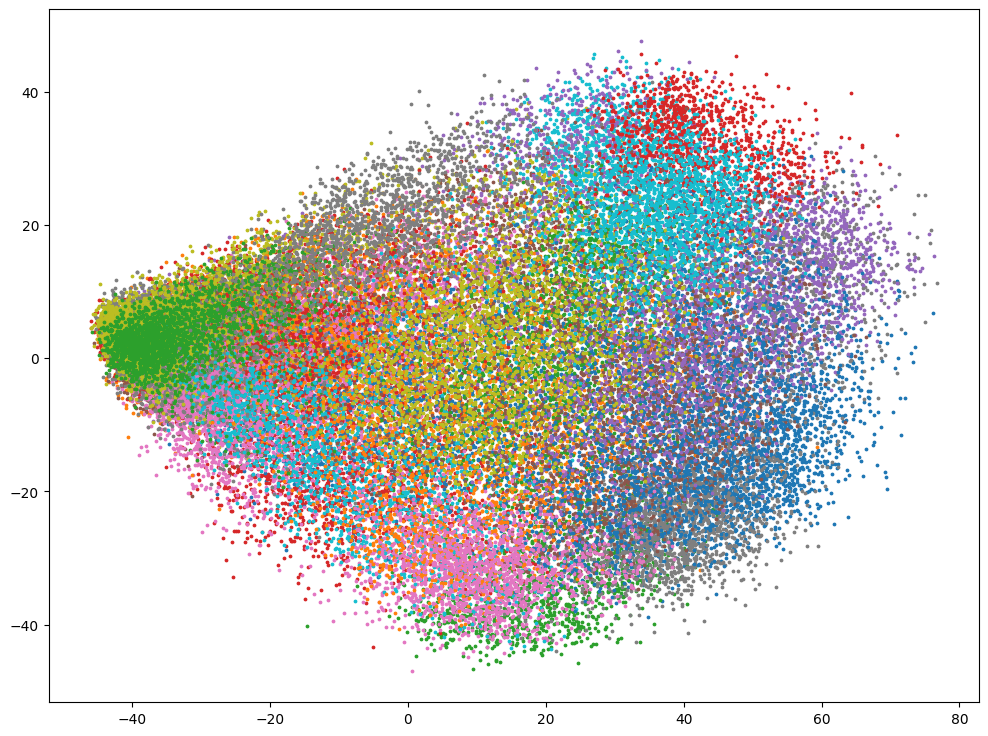

In [11]:
#2d plot of first 3 pca features by cluster

plt.figure(figsize=(12,9))
for i in range(0,40):
    filtered_label = full_feat[full_image_names == i]
    plt.scatter(filtered_label[:,0] , filtered_label[:,1],s=3, label = i)#, color = colours_chosen[i])
#plt.legend()
plt.show() 